<a href="https://colab.research.google.com/github/Noob919/Diabetes_Predictions/blob/main/Models/fearture_selecttion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier


In [2]:
path = "https://raw.githubusercontent.com/Noob919/Diabetes_Predictions/main/DataUsed/diabetes_binary_health_indicators_BRFSS2015.csv"
df =  pd.read_csv(path)
df.head(2)

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0


In [3]:
df['Diabetes_binary'].value_counts()

0.0    218334
1.0     35346
Name: Diabetes_binary, dtype: int64

In [4]:
X = df[['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income']]
y = df['Diabetes_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
len(df.columns)

22

In [6]:
Scaler = StandardScaler()

In [7]:
X_train = Scaler.fit_transform(X_train)
X_test = Scaler.fit_transform(X_test) 
print("Shape of train set",X_train.shape)
print("Shape of test set",X_test.shape)

Shape of train set (177576, 21)
Shape of test set (76104, 21)


In [8]:
from sklearn.linear_model import LogisticRegression

In [19]:
clflr = LogisticRegression(max_iter = 130)
clflr.fit(X_train, y_train)
pred  = clflr.predict(X_test)
print("Accuracy Score",accuracy_score(y_test,pred))
print("f1 Score",f1_score(y_test,pred))
print("Recall Score", recall_score(y_test,pred))
print('precison Score', precision_score(y_test,pred))

Accuracy Score 0.8651713444759802
f1 Score 0.24545922494301053
Recall Score 0.1589675207162587
precison Score 0.5383870967741935


Text(0.5, 1.0, 'Confusion metrics for Logistic Regression on Test Set')

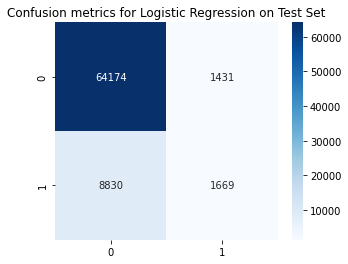

In [29]:
plt.figure(figsize = (5,4))
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix, annot=True,fmt = 'd', cmap = 'Blues')
plt.title('Confusion metrics for Logistic Regression on Test Set')

In [21]:
pred_train  = clflr.predict(X_train)
print("Accuracy Score",accuracy_score(y_train, pred_train))
print("f1 Score",f1_score(y_train, pred_train ))
print("Recall Score", recall_score(y_train, pred_train ))
print('precison Score', precision_score(y_train, pred_train ))

Accuracy Score 0.8628305626886517
f1 Score 0.24255239753716026
Recall Score 0.15696059886505412
precison Score 0.5334427574887156


Text(0.5, 1.0, 'Confusion metrics for Logistic Regression on Train set')

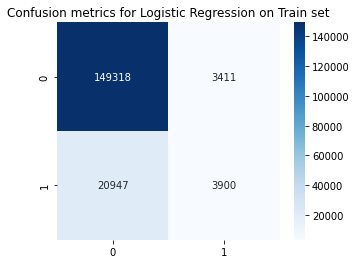

In [28]:
plt.figure(figsize = (5,4))
cf_matrix = confusion_matrix(y_train, pred_train)
sns.heatmap(cf_matrix, annot=True,fmt = 'd', cmap = 'Blues')
plt.title('Confusion metrics for Logistic Regression on Train set')

###Different Data

In [26]:
pred  = clflr.predict(X_test)
print("Accuracy Score",accuracy_score(y_test,pred))
print("f1 Score",f1_score(y_test,pred, average = 'macro'))
print("Recall Score", recall_score(y_test,pred, average = 'macro'))
print('precison Score', precision_score(y_test,pred, average = 'macro'))

Accuracy Score 0.8651713444759802
f1 Score 0.5857154214738067
Recall Score 0.5685775794267979
precison Score 0.7087174100933047


In [9]:
!pip install mlxtend --upgrade --no-deps

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.3 MB 14.5 MB/s 
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [10]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

In [11]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [12]:
RF = DecisionTreeClassifier(random_state = 0)

In [13]:
sfs = SFS(RF, 
           k_features= (1,21), 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=3).fit(X_train,y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    4.8s finished

[2022-06-10 10:26:33] Features: 1/21 -- score: 0.8600768121818264[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    6.2s finished

[2022-06-10 10:26:39] Features: 2/21 -- score: 0.8600768121818264[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    7.0s finished

[2022-06-10 10:26:47] Features: 3/21 -- score: 0.8612706672072803[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [14]:
info = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

In [15]:
info

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(0,)","[0.8600655493985674, 0.8600824435734559, 0.860...",0.860077,"(0,)",0.000018,0.000008,0.000006
2,"(0, 1)","[0.8600655493985674, 0.8600824435734559, 0.860...",0.860077,"(0, 1)",0.000018,0.000008,0.000006
3,"(0, 1, 3)","[0.8604541154210028, 0.8617211785376402, 0.861...",0.861271,"(0, 1, 3)",0.001302,0.000578,0.000409
4,"(0, 1, 3, 13)","[0.8632923368022706, 0.864525611569131, 0.8633...",0.863737,"(0, 1, 3, 13)",0.001258,0.000559,0.000395
5,"(0, 1, 3, 10, 13)","[0.8634105960264901, 0.86476213001757, 0.86344...",0.863872,"(0, 1, 3, 10, 13)",0.001416,0.000629,0.000445
6,"(0, 1, 2, 3, 10, 13)","[0.8634950669009326, 0.8644918232193539, 0.863...",0.863777,"(0, 1, 2, 3, 10, 13)",0.001147,0.00051,0.00036
7,"(0, 1, 2, 3, 5, 10, 13)","[0.8630220300040546, 0.8636977969995946, 0.862...",0.863118,"(0, 1, 2, 3, 5, 10, 13)",0.00099,0.00044,0.000311
8,"(0, 1, 2, 3, 5, 10, 11, 13)","[0.8618394377618597, 0.8631909717529396, 0.861...",0.862273,"(0, 1, 2, 3, 5, 10, 11, 13)",0.001461,0.000649,0.000459
9,"(0, 1, 2, 3, 5, 10, 11, 12, 13)","[0.8610116231923233, 0.8613832950398702, 0.861...",0.861299,"(0, 1, 2, 3, 5, 10, 11, 12, 13)",0.00047,0.000209,0.000148
10,"(0, 1, 2, 3, 5, 10, 11, 12, 13, 17)","[0.8589843222057034, 0.8583761319097175, 0.859...",0.859007,"(0, 1, 2, 3, 5, 10, 11, 12, 13, 17)",0.00118,0.000524,0.000371


In [16]:
sfs.k_feature_idx_

(0, 1, 3, 10, 13)

In [17]:
sfs.k_score_

0.863872370140109

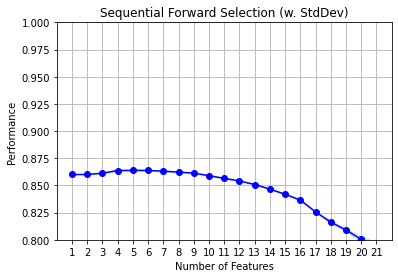

In [18]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Forward Selection (w. StdDev)')
plt.grid()
plt.show()

In [53]:
sfs = SFS(RF, 
           k_features= (1,21), 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=3).fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:   33.7s finished

[2022-06-09 19:29:48] Features: 20/1 -- score: 0.8004291120421678[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   29.4s finished

[2022-06-09 19:30:17] Features: 19/1 -- score: 0.8113371176285084[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:   23.5s finished

[2022-06-09 19:30:40] Features: 18/1 -- score: 0.8255676442762535[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

In [54]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
21,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.7981821867819976, 0.793384241113664, 0.7953...",0.795648,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.004429,0.001968,0.001392
20,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.8050581159616165, 0.7977260440600081, 0.798...",0.800429,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...",0.0074,0.003289,0.002325
19,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.8120860927152318, 0.8095181781321801, 0.812...",0.811337,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0.002909,0.001293,0.000914
18,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.8273246384646574, 0.8246215704824976, 0.824...",0.825568,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0.002799,0.001244,0.000879
17,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...","[0.836700905527774, 0.8351128530882552, 0.8337...",0.835192,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",0.002703,0.001201,0.00085
16,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16...","[0.8467360454115421, 0.8450128395729153, 0.846...",0.846145,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16...",0.001802,0.000801,0.000566
15,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16...","[0.8523786998243006, 0.8532571969185025, 0.853...",0.853167,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 16...",0.001373,0.00061,0.000432
14,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 16, 17)","[0.8573286930666306, 0.8573624814164076, 0.857...",0.857481,"(0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11, 12, 16, 17)",0.000431,0.000192,0.000136
13,"(0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 16, 17)","[0.8586464387079336, 0.859035004730369, 0.8598...",0.859193,"(0, 1, 2, 5, 6, 7, 8, 9, 10, 11, 12, 16, 17)",0.001176,0.000522,0.000369
12,"(0, 1, 2, 5, 6, 7, 8, 10, 11, 12, 16, 17)","[0.8594404649276929, 0.859676983376132, 0.8600...",0.859728,"(0, 1, 2, 5, 6, 7, 8, 10, 11, 12, 16, 17)",0.00058,0.000258,0.000182


In [55]:
sfs.k_feature_idx_

(0, 1, 2, 5, 6, 10, 16, 17)

In [56]:
sfs.k_feature_names_

('0', '1', '2', '5', '6', '10', '16', '17')

In [57]:
sfs.k_score_

0.8607694733522547

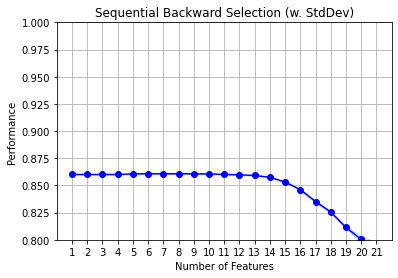

In [58]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')

plt.ylim([0.8, 1])
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()

In [19]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

In [22]:
efs = EFS(RF, min_features=2,max_features = 21,n_jobs = -1).fit(X_train,y_train)  

PicklingError: ignored

In [ ]:
efs.best_score_